In [1]:
import numpy as np
import pandas as pd
import time
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import nltk
from nltk.corpus import stopwords

In [3]:
from nltk.stem import PorterStemmer 
from nltk.tokenize import word_tokenize 

In [4]:
from collections import Counter

In [5]:
uc = pd.read_csv('uscan.csv')
uc = uc.drop('Unnamed: 0', axis = 1)

In [6]:
uc.shape

(1952885, 32)

In [7]:
uc.head()

,Company Name,Street Address,City,State,Zip Code,Country,Full Address,Revenue,Employees,Industries,...,Profile.1,Name.2,Title.2,Profile.2,Name.3,Title.3,Profile.3,country,revenue,state
0,AasthaFoundation,1600 Amphitheatre Parkway,Mountain View,California,94043,United States,1600 Amphitheatre Parkway Mountain View Califo...,NaN,NaN,"Charitable Organizations & Foundations,Organiz...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,United States,NaN,California
1,Aastro Roofing Inc,FL 33064 1700 JUANA RD,Deerfield Beach,Florida,33064,United States,FL 33064 1700 JUANA RD Deerfield Beach Florida...,$2.4 Million,12,"Commercial & Residential Construction,Construc...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,United States,2400000.0,Florida
2,AASTRO Transmission,5302 E Speedway Blvd,Tucson,Arizona,85712,United States,5302 E Speedway Blvd Tucson Arizona 85712 Unit...,$2 Million,10,"Automotive Service & Collision Repair,Consumer...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,United States,2000000.0,Arizona
3,"Aastrom Biosciences , Inc.",24 Frank Lloyd Wright Drive,Ann Arbor,Michigan,48105,United States,24 Frank Lloyd Wright Drive Ann Arbor Michigan...,$7 Million,35,"Biotechnology,Pharmaceuticals,Healthcare,Drug ...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,United States,7000000.0,Michigan
4,AASuccess,6521 Arlington Blvd. Suite 401,Falls Church,Virginia,22042,United States,6521 Arlington Blvd. Suite 401 Falls Church Vi...,NaN,10,"Charitable Organizations & Foundations,Organiz...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,United States,NaN,Virginia


In [8]:
uc.columns

Index(['Company Name', 'Street Address', 'City', 'State', 'Zip Code',
       'Country', 'Full Address', 'Revenue', 'Employees', 'Industries',
       'SIC Code', 'NAICS Code', 'Phone', 'Fax', 'Website', 'Description',
       'Other Profiles', 'Name', 'Title', 'Profile', 'Name.1', 'Title.1',
       'Profile.1', 'Name.2', 'Title.2', 'Profile.2', 'Name.3', 'Title.3',
       'Profile.3', 'country', 'revenue', 'state'],
      dtype='object')

In [8]:
df = uc[['Company Name', 'Street Address', 'City', 'state', 'Zip Code',
       'country', 'Full Address', 'revenue', 'Employees', 'Industries',
       'SIC Code', 'NAICS Code', 'Phone', 'Fax', 'Website', 'Description',
       'Other Profiles', 'Name', 'Title', 'Profile', 'Name.1', 'Title.1',
       'Profile.1', 'Name.2', 'Title.2', 'Profile.2', 'Name.3', 'Title.3',
       'Profile.3']]

In [10]:
sum(df.revenue.isnull() == True)/df.revenue.shape[0]

0.25320743412950586

In [11]:
sum(df.revenue.isnull() == True)

494485

In [12]:
noCountry = df[pd.isnull(df.country)]
noRev = df[pd.isnull(df.revenue)]
noIndustry = df[pd.isnull(df.Industries)]
noState = df[pd.isnull(df.state)]

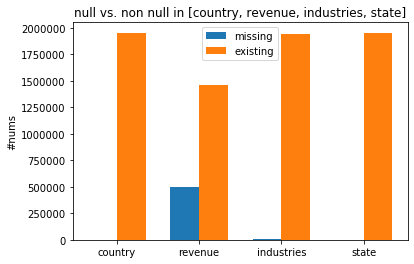

In [13]:
missingdata = [noCountry.shape[0], noRev.shape[0], noIndustry.shape[0], noState.shape[0]]
existeddata = [df[(df.country.notnull())].shape[0],df[(df.revenue.notnull())].shape[0], \
               df[(df.Industries.notnull())].shape[0], df[(df.state.notnull())].shape[0]]
labels = ['country', 'revenue', 'industries', 'state']

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars
fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, missingdata, width, label='missing')
rects2 = ax.bar(x + width/2, existeddata, width, label='existing')

ax.set_ylabel('#nums')
ax.set_title('null vs. non null in [country, revenue, industries, state]')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

In [17]:
df['Industries'] = df['Industries'].str.replace('and', '&')

C:\Users\yle\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [18]:
test = df['Industries'].str.split(',')

In [10]:
def strip(lst):
    if isinstance(lst, float): return lst
    newlst = []
    for i in lst:
        newlst.append(i.strip())
    return newlst

In [11]:
b = test.apply(strip)

In [16]:
a = pd.DataFrame()
a['test'] = b
a['original'] = df['Industries']

In [17]:
ctr = 20
for i in range(len(a)):
    if i == ctr: break
    print(' ')
    print(a['test'][i])
    print(a['original'][i])

 
['Charitable Organizations & Foundations', 'Organizations']
Charitable Organizations & Foundations,Organizations
 
['Commercial & Residential Construction', 'Construction']
Commercial & Residential Construction,Construction
 
['Automotive Service & Collision Repair', 'Consumer Services']
Automotive Service & Collision Repair,Consumer Services
 
['Biotechnology', 'Pharmaceuticals', 'Healthcare', 'Drug Manufacturing & Research']
Biotechnology,Pharmaceuticals,Healthcare,Drug Manufacturing & Research
 
['Charitable Organizations & Foundations', 'Organizations']
Charitable Organizations & Foundations,Organizations
 
['Funeral Homes & Funeral Related Services', 'Consumer Services']
Funeral Homes & Funeral Related Services,Consumer Services
 
['Membership Organizations', 'Organizations']
Membership Organizations,Organizations
 
['Flowers', 'Gifts & Specialty', 'Retail']
Flowers, Gifts & Specialty,Retail
 
['Waste Treatment', 'Environmental Services & Recycling', 'Energy', 'Utilities & Waste

In [18]:
path = 'other_data/NAICS Industry.csv'
ind = pd.read_csv(path)

In [19]:
indCols = ind.columns
indCols

Index(['Sector', 'Industry', 'Sub-Vertical'], dtype='object')

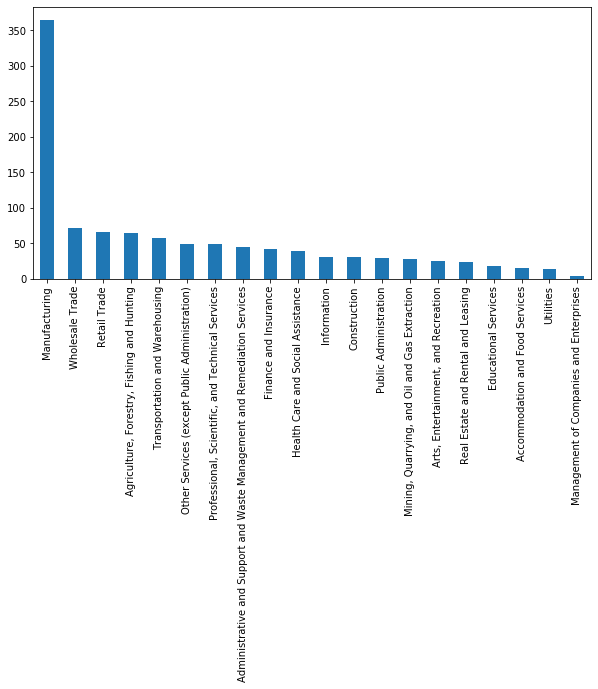

In [20]:
ind.Sector.value_counts().plot.bar(figsize = (10,5))

In [136]:
ind_sector_ = ind.Sector.str.replace("and", "&")
ind_industry_ = ind.Industry.str.replace("and", "&")
ind_subv_ = ind['Sub-Vertical'].str.replace("and", "&")

In [24]:
len(ind_sector_.value_counts()), len(ind_industry_.value_counts()), len(ind_subv_.value_counts())

(20, 311, 1057)

In [122]:
bigtest = []
for i in b:
    if isinstance(i, float): continue
    for j in i:
        bigtest.append(j.strip())

In [123]:
len(set(bigtest))

209

In [124]:
len(bigtest)

4833307

In [125]:
set(bigtest)

{'A/V',
 'Accounting & Accounting Services',
 'Advertising & Marketing',
 'Aerospace & Defense',
 'Aggregates',
 'Agriculture',
 'Airlines',
 'Airports & Air Services',
 'Amusement Parks',
 'Animals & Livestock',
 'Apparel & Accessories',
 'Appliances',
 'Arcades & Attractions',
 'Architecture',
 'Auctions',
 'Automobile Parts Stores',
 'Automobiles',
 'Automotive Service & Collision Repair',
 'Banking',
 'Batteries',
 'Beauty Supply & Personal Care Products',
 'Beverages & Tobacco',
 'Biotechnology',
 'Boats & Submarines',
 'Broadcasting',
 'Brokerage',
 'Building Materials',
 'Bus & Taxi',
 'Business Intelligence Software(BI)',
 'Business Services',
 'Cabinets',
 'Cable & Satellite',
 'Call Centers & Business Centers',
 'Car & Truck Rental',
 'Chambers of Commerce',
 'Charitable Organizations & Foundations',
 'Chemicals',
 'Cities',
 'Cleaning Products',
 'Colleges & Universities',
 'Commercial & Residential Construction',
 'Commercial Printing',
 'Computer Equipment & Peripherals',


### bigtest is a set for all industries in the dataset df. we are going to categorize it with ind_industry
- remove all stop words
- stem the words

In [126]:
dfind_list = list(set(bigtest))
len(dfind_list) == len(set(bigtest))

True

In [13]:
import nltk
from nltk.corpus import stopwords

In [14]:
from nltk.stem import PorterStemmer 
from nltk.tokenize import word_tokenize 

In [15]:
ps = PorterStemmer()

In [16]:
def stemming(ls):
    return [ps.stem(i) for i in ls]

In [132]:
stop_words = set(stopwords.words('english')) 

In [133]:
dfind_list_ = pd.Series(dfind_list).str.split(' ').apply(lambda x:[a.strip(',').strip('(').strip(')') for \
                                                                   a in x if (a!= '&') and (a not in stop_words)])
dfind_list_

0                              [Arcades, Attractions]
1             [Storage, System, Management, Software]
2                         [Games, graphics, Software]
3                                          [Software]
4                  [Laundry, Dry, Cleaning, Services]
                            ...                      
204    [Emergency, Medical, Transportation, Services]
205                [Marine, Shipping, Transportation]
206                         [Motor, Vehicle, Dealers]
207                      [Weight, Health, Management]
208                          [Advertising, Marketing]
Length: 209, dtype: object

In [137]:
ind_industry_1 = pd.Series(list(set(list(ind_industry_))))

In [138]:
# industry first
ind_industry_2 = pd.Series(list(set(list(ind_industry_)))).str.split(' ').apply(lambda x:[a.strip(',').strip('(').strip(')') \
                                                                                          for a in x if (a!= '&') \
                                                                                          and (a not in stop_words)])
ind_industry_2

0                       [Child, Day, Care, Services]
1                         [Taxi, Limousine, Service]
2         [Jewelry, Luggage, Leather, Goods, Stores]
3                   [Basic, Chemical, Manufacturing]
4             [Industrial, Machinery, Manufacturing]
                           ...                      
306            [Other, Miscellaneous, Manufacturing]
307                  [Utility, System, Construction]
308                            [Private, Households]
309    [Scientific, Research, Development, Services]
310                      [Technical, Trade, Schools]
Length: 311, dtype: object

In [141]:
trans_dfind_list = dfind_list_.apply(stemming)
trans_ind_industry = ind_industry_2.apply(stemming)

In [142]:
#see how it becomes
comp_df1 = pd.DataFrame()
comp_df1['original_list'] = dfind_list_
comp_df1['transformed_list'] = trans_dfind_list
comp_df1

,original_list,transformed_list
0,"[Arcades, Attractions]","[arcad, attract]"
1,"[Storage, System, Management, Software]","[storag, system, manag, softwar]"
2,"[Games, graphics, Software]","[game, graphic, softwar]"
3,[Software],[softwar]
4,"[Laundry, Dry, Cleaning, Services]","[laundri, dri, clean, servic]"
...,...,...
204,"[Emergency, Medical, Transportation, Services]","[emerg, medic, transport, servic]"
205,"[Marine, Shipping, Transportation]","[marin, ship, transport]"
206,"[Motor, Vehicle, Dealers]","[motor, vehicl, dealer]"
207,"[Weight, Health, Management]","[weight, health, manag]"


In [143]:
def jaccard_similarity(list1, list2):
    intersection = len(set(list1).intersection(list2))
    union = (len(list1) + len(list2)) - intersection
    return float(intersection) / union

In [144]:
%%time
dfind_score = []
for i in trans_dfind_list:
    scores = {}
    for j in range(len(trans_ind_industry)):
        jc_sim = jaccard_similarity(i, trans_ind_industry[j])
        scores[j] = jc_sim
    dfind_score.append(scores)

Wall time: 831 ms


In [145]:
#the length of the score should be equal to dfind_list(set of bigtest)/also the df industry col
len(dfind_score) == len(trans_dfind_list)

True

In [146]:
len(dfind_score[0]) == len(trans_ind_industry)
len(trans_ind_industry)

311

In [147]:
len(dfind_list)

209

In [148]:
ind_industry_1

0                         Child Day Care Services
1                        Taxi & Limousine Service
2        Jewelry, Luggage, & Leather Goods Stores
3                    Basic Chemical Manufacturing
4              Industrial Machinery Manufacturing
                          ...                    
306             Other Miscellaneous Manufacturing
307                   Utility System Construction
308                            Private Households
309    Scientific Research & Development Services
310                     Technical & Trade Schools
Length: 311, dtype: object

In [154]:
s1 = pd.Series(ind_industry_1)
def findDup(d):
    k = Counter(d)
    high = dict(k.most_common(6)) #the dict of the top 6 highest scores
    peak = k.most_common(1)[0][1] #the highest score 
#     print(peak)
#     print(high)
    print(s1.ix[high.keys()])
    return len([x for x in high.values() if x == peak])

In [155]:
findDup(dfind_score[2]), dfind_list[2]

150                         Software Publishers
0                       Child Day Care Services
1                      Taxi & Limousine Service
2      Jewelry, Luggage, & Leather Goods Stores
3                  Basic Chemical Manufacturing
4            Industrial Machinery Manufacturing
dtype: object


C:\Users\ywang\AppData\Local\Continuum\miniconda3\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  


(1, 'Games & graphics Software')

In [156]:
pd.Series([findDup(x) for x in dfind_score]).value_counts() #the distribution of the frequency

C:\Users\ywang\AppData\Local\Continuum\miniconda3\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  


67                   Amusement Parks & Arcades
0                      Child Day Care Services
1                     Taxi & Limousine Service
2     Jewelry, Luggage, & Leather Goods Stores
3                 Basic Chemical Manufacturing
4           Industrial Machinery Manufacturing
dtype: object
150                      Software Publishers
225                    Warehousing & Storage
58                     Urban Transit Systems
104    Management of Companies & Enterprises
307              Utility System Construction
116            Water, Sewage & Other Systems
dtype: object
150                         Software Publishers
0                       Child Day Care Services
1                      Taxi & Limousine Service
2      Jewelry, Luggage, & Leather Goods Stores
3                  Basic Chemical Manufacturing
4            Industrial Machinery Manufacturing
dtype: object
150                         Software Publishers
0                       Child Day Care Services
1                     

dtype: object
27                    Rail Transportation
37              Inl& Water Transportation
127                  Ship & Boat Building
156    Freight Transportation Arrangement
271         Other Pipeline Transportation
281       Nonscheduled Air Transportation
dtype: object
146                          Other Motor Vehicle Dealers
16                           Motor Vehicle Manufacturing
70                     Motor Vehicle Parts Manufacturing
102           Motor Vehicle Body & Trailer Manufacturing
46                                    Automobile Dealers
301    Motor Vehicle & Motor Vehicle Parts & Supplies...
dtype: object
104                Management of Companies & Enterprises
167                            Home Health Care Services
209                Offices of Other Health Practitioners
303                        Health & Personal Care Stores
34     Business Schools & Computer & Management Training
117        Remediation & Other Waste Management Services
dtype: object
61      

1    129
6     28
2     25
3     19
5      4
4      4
dtype: int64

In [49]:
list_of_freq = []
for i in range(len(dfind_list)):
    list_of_freq.append(findDup(dfind_score[i]))

0.0
{0: 0.0, 1: 0.0, 2: 0.0, 3: 0.0, 4: 0.0, 5: 0.0}
0                        Direct Selling Establishments
1    Deep Sea, Coastal, & Great Lakes Water Transpo...
2    Metal & Mineral (except Petroleum) Merchant Wh...
3     Drugs & Druggists' Sundries Merchant Wholesalers
4                Other Ambulatory Health Care Services
5                               Other Support Services
dtype: object
0.25
{228: 0.25, 71: 0.2, 234: 0.2, 237: 0.2, 241: 0.2, 293: 0.2}
228                   Rail Transportation
71     Freight Transportation Arrangement
234                  Ship & Boat Building
237          Scheduled Air Transportation
241       Nonscheduled Air Transportation
293         Other Pipeline Transportation
dtype: object
0.5
{116: 0.5, 252: 0.2, 0: 0.0, 1: 0.0, 2: 0.0, 3: 0.0}
116                                       Grocery Stores
252       Grocery & Related Product Merchant Wholesalers
0                          Direct Selling Establishments
1      Deep Sea, Coastal, & Great Lakes Wat

dtype: object
0.0
{0: 0.0, 1: 0.0, 2: 0.0, 3: 0.0, 4: 0.0, 5: 0.0}
0                        Direct Selling Establishments
1    Deep Sea, Coastal, & Great Lakes Water Transpo...
2    Metal & Mineral (except Petroleum) Merchant Wh...
3     Drugs & Druggists' Sundries Merchant Wholesalers
4                Other Ambulatory Health Care Services
5                               Other Support Services
dtype: object
0.3333333333333333
{188: 0.3333333333333333, 310: 0.3333333333333333, 93: 0.25, 109: 0.25, 126: 0.25, 161: 0.25}
188             Offices of Physicians
310               Offices of Dentists
93           Poultry & Egg Production
109       Dairy Product Manufacturing
126      Rubber Product Manufacturing
161    Plastics Product Manufacturing
dtype: object
0.2
{51: 0.2, 282: 0.2, 296: 0.2, 0: 0.0, 1: 0.0, 2: 0.0}
51                   Spring & Wire Product Manufacturing
282               Cable & Other Subscription Programming
296         Wired & Wireless Telecommunications Carriers
0    

C:\Users\ywang\AppData\Local\Continuum\miniconda3\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  



0.4
{70: 0.4, 26: 0.2, 75: 0.2, 217: 0.2, 5: 0.16666666666666666, 9: 0.16666666666666666}
70     Drycleaning & Laundry Services
26                Employment Services
75                     Postal Service
217                    Legal Services
5              Other Support Services
9          Other Information Services
dtype: object
0.25
{206: 0.25, 262: 0.25, 285: 0.25, 21: 0.2, 127: 0.2, 149: 0.2}
206               Personal Care Services
262                  Death Care Services
285              Outpatient Care Centers
21     Other Residential Care Facilities
127              Child Day Care Services
149            Home Health Care Services
dtype: object
0.25
{26: 0.25, 75: 0.25, 217: 0.25, 5: 0.2, 9: 0.2, 44: 0.2}
26            Employment Services
75                 Postal Service
217                Legal Services
5          Other Support Services
9      Other Information Services
44          Special Food Services
dtype: object
0.4
{207: 0.4, 131: 0.14285714285714285, 196: 0.14285714285

dtype: object
0.3333333333333333
{184: 0.3333333333333333, 11: 0.25, 44: 0.25, 125: 0.25, 230: 0.25, 150: 0.2}
184                   Beverage Manufacturing
11                  Other Food Manufacturing
44                     Special Food Services
125                Animal Food Manufacturing
230                    Specialty Food Stores
150    Drinking Places (Alcoholic Beverages)
dtype: object
0.2
{117: 0.2, 193: 0.2, 0: 0.0, 1: 0.0, 2: 0.0, 3: 0.0}
117              Clay Product & Refractory Manufacturing
193                  Glass & Glass Product Manufacturing
0                          Direct Selling Establishments
1      Deep Sea, Coastal, & Great Lakes Water Transpo...
2      Metal & Mineral (except Petroleum) Merchant Wh...
3       Drugs & Druggists' Sundries Merchant Wholesalers
dtype: object
0.2857142857142857
{247: 0.2857142857142857, 98: 0.14285714285714285, 118: 0.14285714285714285, 177: 0.14285714285714285, 212: 0.14285714285714285, 232: 0.14285714285714285}
247    Building Ma

In [83]:
tbl_of_freq = pd.DataFrame(data = list_of_freq, columns = ['freq'])
tbl_of_freq.head()

,freq
0,2
1,2
2,1
3,2
4,1


In [84]:
idx_of_1 = list(tbl_of_freq[tbl_of_freq['freq'] == 1].index)
idx_of_2 = list(tbl_of_freq[tbl_of_freq['freq'] == 2].index)
idx_of_3 = list(tbl_of_freq[tbl_of_freq['freq'] == 3].index)
idx_of_4 = list(tbl_of_freq[tbl_of_freq['freq'] == 4].index)
idx_of_5 = list(tbl_of_freq[tbl_of_freq['freq'] == 5].index)
idx_of_6 = list(tbl_of_freq[tbl_of_freq['freq'] == 6].index)

In [85]:
tbl_of_freq['match'] = ['-1' for x in range(len(tbl_of_freq))]
tbl_of_freq.head()

,freq,match
0,2,-1
1,2,-1
2,1,-1
3,2,-1
4,1,-1


In [86]:
tbl_of_freq.iloc[:2]

,freq,match
0,2,-1
1,2,-1


In [87]:
s1 = pd.Series(ind_industry_1)
def getMatch(d):
    k = Counter(d)
    high = dict(k.most_common(6)) #the dict of the top 6 highest scores
    peak = k.most_common(1)[0][1] #the highest score 
#     print(high)
    freq = len([x for x in high.values() if x == peak])    
    return(s1.ix[high.keys()].iloc[:freq])

In [88]:
getMatch(dfind_score[0])

C:\Users\ywang\AppData\Local\Continuum\miniconda3\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  


155    Psychiatric & Substance Abuse Hospitals
290       General Medical & Surgical Hospitals
dtype: object

In [89]:
for idx in range(len(dfind_score)):
    if tbl_of_freq.at[idx, 'freq'] == 1:
        tbl_of_freq.at[idx, 'match'] = getMatch(dfind_score[idx]).item()

C:\Users\ywang\AppData\Local\Continuum\miniconda3\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  
C:\Users\ywang\AppData\Local\Continuum\miniconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: `item` has been deprecated and will be removed in a future version
  This is separate from the ipykernel package so we can avoid doing imports until


In [90]:
tbl_of_freq['original'] = dfind_list

In [185]:
with pd.option_context("display.max_rows", 209):
    display(tbl_of_freq.ix[idx_of_1])

C:\Users\ywang\AppData\Local\Continuum\miniconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  


,freq,match,original
2,1,Management of Companies & Enterprises,Enterprise Resource Planning Software(ERP)
4,1,Glass & Glass Product Manufacturing,Glass & Gases
5,1,"Engine, Turbine, & Power Transmission Equipmen...",Power Conversion & Protection Equipment
7,1,"Management, Scientific, & Technical Consulting...",Custom Software & Technical Consulting
8,1,Computer Systems Design and Related Services,Software Development & Design
9,1,Rail Transportation,Transportation
10,1,Religious Organizations,Charitable Organizations & Foundations
11,1,Management of Companies & Enterprises,Customer Relationship Management Software(CRM)
13,1,Investigation & Security Services,Security Products & Services
14,1,Securities and Commodity Contracts Intermediat...,Brokerage


Index of match that needs to pay attention to: 1, 10, 52, 75, 78, 132, 154(Utilities & Waste Treatment), 193. I found out the terms that needed to be modified.

In [58]:
tbl_of_freq.at[81, 'match'] =  'Newspaper, Periodical, Book, & Directory Publishers'
tbl_of_freq.at[87, 'match'] =  'Investigation & Security Services'
tbl_of_freq.at[101, 'match'] = 'Advertising, Public Relations, and Related Services'
tbl_of_freq.at[118, 'match'] = 'Other Financial Investment Activities'
tbl_of_freq.at[160, 'match'] = 'Depository Credit Intermediation'
tbl_of_freq.at[182, 'match'] = 'Computer Systems Design & Related Services'

In [98]:
for idx in range(len(dfind_score)):
    if tbl_of_freq.at[idx, 'freq'] == 2:
        tbl_of_freq.at[idx, 'match'] = list(getMatch(dfind_score[idx]))

C:\Users\ywang\AppData\Local\Continuum\miniconda3\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  


In [116]:
tbl_of_freq.ix[idx_of_2]

C:\Users\ywang\AppData\Local\Continuum\miniconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


,freq,match,original
0,2,Traveler Accommodation,Hospitality
1,2,"Architectural, Engineering, & Related Services",Architecture
3,2,Software Publishers,Network Security Hardware & Software
15,2,Satellite Telecommunications,Telecommunications
27,2,Software Publishers,Legal & HR Software
29,2,Death Care Services,Funeral Homes & Funeral Related Services
31,2,Software Publishers,Storage & System Management Software
35,2,Taxi & Limousine Service,Bus & Taxi
73,2,Industrial Machinery Manufacturing,Industrial Machinery & Equipment
78,2,Other Miscellaneous Manufacturing,Office Products


In [113]:
tbl_of_freq.at[78, 'match'] = 'Other Miscellaneous Manufacturing'
tbl_of_freq.at[0, 'match'] = 'Traveler Accommodation'
tbl_of_freq.at[97, 'match'] =  'Miscellaneous Nondurable Goods Merchant Wholesalers'
tbl_of_freq.at[29, 'match'] = 'Death Care Services'
tbl_of_freq.at[94, 'match'] = 'Water, Sewage and Other Systems'
tbl_of_freq.at[177, 'match'] = 'Clothing Stores'

In [114]:
#first is a list that contains index of rows whose 'match' is the first item in the list
first = [1,3,15,27,31,35,73, 88, 89, 123, 175, 183, 190]
back = [117, 149, 160, 161, 200, 206]

In [115]:
for i in first:
    target = tbl_of_freq.loc[i]['match'][0]
    tbl_of_freq.at[i, 'match'] = target
for i in back:
    target = tbl_of_freq.loc[i]['match'][1]
    tbl_of_freq.at[i, 'match'] = target

In [117]:
for idx in range(len(dfind_score)):
    if tbl_of_freq.at[idx, 'freq'] == 3:
        tbl_of_freq.at[idx, 'match'] = list(getMatch(dfind_score[idx]))
tbl_of_freq.ix[idx_of_3]

C:\Users\ywang\AppData\Local\Continuum\miniconda3\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  
C:\Users\ywang\AppData\Local\Continuum\miniconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  after removing the cwd from sys.path.


,freq,match,original
25,3,"[Legal Services, Employment Services, Postal S...",Freight & Logistics Services
36,3,"[Legal Services, Employment Services, Postal S...",Airports & Air Services
48,3,"[Personal Care Services, Outpatient Care Cente...",Veterinary Care
61,3,"[Nonresidential Building Construction, Utility...",Construction
72,3,"[Outpatient Care Centers, Business Support Ser...",Call Centers & Business Centers
76,3,"[Cable & Other Subscription Programming, Wired...",Wire & Cable
82,3,"[Legal Services, Employment Services, Postal S...",Consumer Services
83,3,"[Other Animal Production, Animal Food Manufact...",Animals & Livestock
91,3,"[Motion Picture & Video Industries, Audio & Vi...",Videos & Books
101,3,"[Legal Services, Employment Services, Postal S...",Environmental Services & Recycling


In [132]:
tbl_of_freq.at[147, 'match'] = 'Newspaper, Periodical, Book, & Directory Publishers'
tbl_of_freq.at[186, 'match'] =  'Motion Picture & Video Industries'
tbl_of_freq.at[25, 'match'] = 'Freight Transportation Arrangement'
tbl_of_freq.at[155, 'match'] = 'Navigational, Measuring, Electromedical, and Control Instruments Manufacturing'
tbl_of_freq.at[202, 'match'] = 'Other Professional, Scientific, and Technical Services'
tbl_of_freq.at[36, 'match'] = 'Support Activities for Air Transportation'
tbl_of_freq.at[145, 'match'] =  'Semiconductor & Other Electronic Component Manufacturing'
tbl_of_freq.at[82, 'match'] = 'Management, Scientific, and Technical Consulting Services'
tbl_of_freq.at[174, 'match'] = 'Wired and Wireless Telecommunications Carriers'
tbl_of_freq.at[144, 'match'] = 'Professional and Commercial Equipment and Supplies Merchant Wholesalers'
tbl_of_freq.at[48, 'match'] ='Other Professional, Scientific, and Technical Services'

In [133]:
front = [198]
mid = [72, 83, 101, 152]
last = [76, 91]
for i in front:
    target = tbl_of_freq.loc[i]['match'][0]
    tbl_of_freq.at[i, 'match'] = target  
for i in mid:
    target = tbl_of_freq.loc[i]['match'][1]
    tbl_of_freq.at[i, 'match'] = target 
for i in last:
    target = tbl_of_freq.loc[i]['match'][2]
    tbl_of_freq.at[i, 'match'] = target 

In [134]:
tbl_of_freq.ix[idx_of_3]

C:\Users\ywang\AppData\Local\Continuum\miniconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


,freq,match,original
25,3,Freight Transportation Arrangement,Freight & Logistics Services
36,3,Support Activities for Air Transportation,Airports & Air Services
48,3,"Other Professional, Scientific, and Technical ...",Veterinary Care
61,3,"[Nonresidential Building Construction, Utility...",Construction
72,3,Business Support Services,Call Centers & Business Centers
76,3,Spring & Wire Product Manufacturing,Wire & Cable
82,3,"Management, Scientific, and Technical Consulti...",Consumer Services
83,3,Animal Food Manufacturing,Animals & Livestock
91,3,Book Stores & News Dealers,Videos & Books
101,3,Employment Services,Environmental Services & Recycling


In [135]:
for idx in range(len(dfind_score)):
    if tbl_of_freq.at[idx, 'freq'] == 4:
        tbl_of_freq.at[idx, 'match'] = list(getMatch(dfind_score[idx]))
tbl_of_freq.ix[idx_of_4]

C:\Users\ywang\AppData\Local\Continuum\miniconda3\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  
C:\Users\ywang\AppData\Local\Continuum\miniconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  after removing the cwd from sys.path.


,freq,match,original
50,4,"[Beverage Manufacturing, Footwear Manufacturin...",Drug Manufacturing & Research
128,4,"[Other Food Manufacturing, Animal Food Manufac...",Food
166,4,"[Specialized Freight Trucking, General Freight...",Car & Truck Rental
201,4,"[Beverage Manufacturing, Footwear Manufacturin...",Manufacturing


In [138]:
tbl_of_freq.at[50, 'match'] = 'Pharmaceutical and Medicine Manufacturing'
tbl_of_freq.at[128, 'match'] = 'Grocery and Related Product Merchant Wholesalers'
tbl_of_freq.at[166, 'match'] = 'General Freight Trucking'

In [158]:
tbl_of_freq.ix[idx_of_4]

C:\Users\ywang\AppData\Local\Continuum\miniconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


,freq,match,original
50,4,Pharmaceutical and Medicine Manufacturing,Drug Manufacturing & Research
128,4,Grocery and Related Product Merchant Wholesalers,Food
166,4,General Freight Trucking,Car & Truck Rental
201,4,"[Beverage Manufacturing, Footwear Manufacturin...",Manufacturing


In [140]:
for idx in range(len(dfind_score)):
    if tbl_of_freq.at[idx, 'freq'] == 5:
        tbl_of_freq.at[idx, 'match'] = list(getMatch(dfind_score[idx]))
tbl_of_freq.ix[idx_of_5]

C:\Users\ywang\AppData\Local\Continuum\miniconda3\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  
C:\Users\ywang\AppData\Local\Continuum\miniconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  after removing the cwd from sys.path.


,freq,match,original
6,5,"[Dairy Product Manufacturing, Other Animal Pro...",Health & Nutrition Products
12,5,"[Dairy Product Manufacturing, Other Animal Pro...",Pet Products
102,5,"[Shoe Stores, Department Stores, Grocery Store...",Drug Stores & Pharmacies
179,5,"[Dairy Product Manufacturing, Other Animal Pro...",Cleaning Products


In [144]:
tbl_of_freq.at[12, 'match'] = 'Other Miscellaneous Store Retailers'
tbl_of_freq.at[179, 'match'] = 'Soap, Cleaning Compound, and Toilet Preparation Manufacturing'
tbl_of_freq.at[6, 'match'] = 'Health and Personal Care Stores'
tbl_of_freq.at[102, 'match'] = 'Health and Personal Care Stores'

In [145]:
tbl_of_freq.ix[idx_of_5]

C:\Users\ywang\AppData\Local\Continuum\miniconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


,freq,match,original
6,5,Health and Personal Care Stores,Health & Nutrition Products
12,5,Other Miscellaneous Store Retailers,Pet Products
102,5,Health and Personal Care Stores,Drug Stores & Pharmacies
179,5,"Soap, Cleaning Compound, and Toilet Preparatio...",Cleaning Products


In [146]:
for idx in range(len(dfind_score)):
    if tbl_of_freq.at[idx, 'freq'] == 6:
        tbl_of_freq.at[idx, 'match'] = list(getMatch(dfind_score[idx]))
tbl_of_freq.ix[idx_of_6]

C:\Users\ywang\AppData\Local\Continuum\miniconda3\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  
C:\Users\ywang\AppData\Local\Continuum\miniconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  after removing the cwd from sys.path.


,freq,match,original
38,6,"[Building Equipment Contractors, Satellite Tel...",Batteries
41,6,"[Building Equipment Contractors, Satellite Tel...",Vitamins
45,6,"[Building Equipment Contractors, Satellite Tel...",A/V
52,6,"[Building Equipment Contractors, Satellite Tel...",Auctions
57,6,"[Building Equipment Contractors, Satellite Tel...",Flowers
62,6,"[Building Equipment Contractors, Satellite Tel...",Energy
65,6,"[Building Equipment Contractors, Satellite Tel...",Gases
79,6,"[Building Equipment Contractors, Satellite Tel...",Cultural
113,6,"[Building Equipment Contractors, Satellite Tel...",Cities
119,6,"[Building Equipment Contractors, Satellite Tel...",Petrochemicals


In [162]:
listfor6 = ['Miscellaneous Nondurable Goods Merchant Wholesalers','Health and Personal Care Stores', \
            'Audio and Video Equipment Manufacturing', 'Other Support Services', \
            'Miscellaneous Nondurable Goods Merchant Wholesalers', 'Administration of Economic Programs', \
            'Petroleum and Coal Products Manufacturing', 'Administration of Economic Programs', \
            'Executive, Legislative, and Other General Government Support', 'Basic Chemical Manufacturing', \
            'Motion Picture and Video Industries', 'Personal Care Services', 'Scientific Research and Development Services',\
            'Traveler Accommodation', 'Other Miscellaneous Manufacturing', 'Scheduled Air Transportation', \
            'Healthcare', 'N/A', 'Other Professional, Scientific, and Technical Services', 'N\A', 'Finance', \
            'Business, Professional, Labor, Political, and Similar Organizations', 'Health and Personal Care Stores', \
            'Other Nonmetallic Mineral Product Manufacturing', 'Executive, Legislative, and Other General Government Support',\
            'Advertising, Public Relations, and Related Services', 'Nonresidential Building Construction',\
            'Beverage Manufacturing']

In [164]:
len(listfor6) == len(tbl_of_freq.ix[idx_of_6])

C:\Users\ywang\AppData\Local\Continuum\miniconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


True

In [167]:
for i in range(len(tbl_of_freq.ix[idx_of_6].index)):
    tbl_of_freq.at[list(tbl_of_freq.ix[idx_of_6].index)[i], 'match'] = listfor6[i]

C:\Users\ywang\AppData\Local\Continuum\miniconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.
C:\Users\ywang\AppData\Local\Continuum\miniconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  


In [169]:
with pd.option_context("display.max_rows", 1000):
    display(tbl_of_freq)

,freq,match,original
0,2,Traveler Accommodation,Hospitality
1,2,"Architectural, Engineering, & Related Services",Architecture
2,1,Management of Companies & Enterprises,Enterprise Resource Planning Software(ERP)
3,2,Software Publishers,Network Security Hardware & Software
4,1,Glass & Glass Product Manufacturing,Glass & Gases
5,1,"Engine, Turbine, & Power Transmission Equipmen...",Power Conversion & Protection Equipment
6,5,Health and Personal Care Stores,Health & Nutrition Products
7,1,"Management, Scientific, & Technical Consulting...",Custom Software & Technical Consulting
8,1,Computer Systems Design and Related Services,Software Development & Design
9,1,Rail Transportation,Transportation


- Contruction at loc61
- Finance at loc 180
- Manufactoring at loc201
- Healthcare at loc151 

In [173]:
tbl_of_freq.at[61, 'match'] = 'Construction'
tbl_of_freq.at[201, 'match'] = 'Manufacturing'

In [177]:
matchInd = tbl_of_freq[['match', 'original']]
matchInd.to_csv('match_industry.csv')

In [51]:
matchInd = pd.read_csv('match_industry.csv').drop('Unnamed: 0', axis = 1)
matchInd.head()

,match,original
0,Traveler Accommodation,Hospitality
1,"Architectural, Engineering, & Related Services",Architecture
2,Management of Companies & Enterprises,Enterprise Resource Planning Software(ERP)
3,Software Publishers,Network Security Hardware & Software
4,Glass & Glass Product Manufacturing,Glass & Gases


Uncertain indexes: 9(Transportation), 35(Bus & Taxi), 82(Consumer Services)

In [61]:
matchInd.at[10, 'match'] = 'Grantmaking and Giving Services'
matchInd.at[82, 'match'] = 'Consumer Services' #
matchInd.at[86, 'match'] = 'Music & Music Related Services'#
matchInd.at[89, 'match'] = 'Trucking'#
matchInd.at[92, 'match'] = 'Mining'#
matchInd.at[101, 'match'] = 'Management, Scientific, and Technical Consulting'
matchInd.at[105, 'match'] = 'Museums, Historical Sites, and Similar Institutions'
matchInd.at[129, 'match'] = 'Grocery and Related Product Merchant Wholesalers'
matchInd.at[169, 'match'] = 'Radio and Television Broadcasting'
matchInd.at[170, 'match'] = 'Software Publishers'
matchInd.at[176, 'match'] = 'Consumer Goods'

In [66]:
matchInd.at[171, 'match'] = np.nan

In [68]:
matchInd.to_csv('match_industry.csv')

### Temporarily start from here

In [20]:
matchInd = pd.read_csv('match_industry.csv').drop('Unnamed: 0', axis = 1)
matchInd.head()

,match,original
0,Traveler Accommodation,Hospitality
1,"Architectural, Engineering, & Related Services",Architecture
2,Management of Companies & Enterprises,Enterprise Resource Planning Software(ERP)
3,Software Publishers,Network Security Hardware & Software
4,Glass & Glass Product Manufacturing,Glass & Gases


In [21]:
with pd.option_context("display.max_rows", 209):
    display(matchInd)

,match,original
0,Traveler Accommodation,Hospitality
1,"Architectural, Engineering, & Related Services",Architecture
2,Management of Companies & Enterprises,Enterprise Resource Planning Software(ERP)
3,Software Publishers,Network Security Hardware & Software
4,Glass & Glass Product Manufacturing,Glass & Gases
5,"Engine, Turbine, & Power Transmission Equipmen...",Power Conversion & Protection Equipment
6,Health and Personal Care Stores,Health & Nutrition Products
7,"Management, Scientific, & Technical Consulting...",Custom Software & Technical Consulting
8,Computer Systems Design and Related Services,Software Development & Design
9,Rail Transportation,Transportation


In [22]:
matchIndDict = dict(zip(matchInd.original, matchInd.match))

In [23]:
matchIndDict[(test[0][0])]

'Grantmaking and Giving Services'

In [34]:
def matchDict(row):
    if isinstance(row, float): return row
    newrow = [x.strip() for x in row]
    return [matchIndDict[x] for x in newrow]

In [35]:
matchedInd = test.apply(matchDict)

In [36]:
for i in range(0, 10):
    print(matchedInd[i])

['Grantmaking and Giving Services', 'Business, Professional, Labor, Political, and Similar Organizations']
['Residential Building Construction', 'Construction']
['Automotive Repair & Maintenance', 'Consumer Services']
['Scientific Research and Development Services', 'Pharmaceutical & Medicine Manufacturing', 'Healthcare', 'Pharmaceutical and Medicine Manufacturing']
['Grantmaking and Giving Services', 'Business, Professional, Labor, Political, and Similar Organizations']
['Death Care Services', 'Consumer Services']
['Business, Professional, Labor, Political, and Similar Organizations', 'Business, Professional, Labor, Political, and Similar Organizations']
['Miscellaneous Nondurable Goods Merchant Wholesalers', 'Specialty Food Stores', 'Other Miscellaneous Store Retailers']
['Waste Treatment & Disposal', 'Management, Scientific, and Technical Consulting', 'Administration of Economic Programs', 'Waste Treatment & Disposal']
['Depository Credit Intermediation', 'Finance']


In [37]:
digits = pd.read_csv('digit6.csv')
naicscode = pd.read_csv('other_data/NAICS Industry.csv')
naics = naicscode.merge(digits,  left_on = 'Sub-Vertical', right_on = 'Industry', how = 'left').rename(columns = \
                                                                                                      {'Industry_x': \
                                                                                                       'Industry'}).drop(\
                                                                                                        'Industry_y', axis = 1)
naics = naics.drop_duplicates().reset_index(drop = True)

In [42]:
naics.head()

,Sector,Industry,Sub-Vertical,Code,Pre Code,Cur Code
0,"Agriculture, Forestry, Fishing and Hunting",Oilseed and Grain Farming,Soybean Farming,NAICS 111110,11111.0,0.0
1,"Agriculture, Forestry, Fishing and Hunting",Oilseed and Grain Farming,Oilseed (except Soybean) Farming,NAICS 111120,11112.0,0.0
2,"Agriculture, Forestry, Fishing and Hunting",Oilseed and Grain Farming,Dry Pea and Bean Farming,NAICS 111130,11113.0,0.0
3,"Agriculture, Forestry, Fishing and Hunting",Oilseed and Grain Farming,Wheat Farming,NAICS 111140,11114.0,0.0
4,"Agriculture, Forestry, Fishing and Hunting",Oilseed and Grain Farming,Corn Farming,NAICS 111150,11115.0,0.0


In [36]:
ps = PorterStemmer()
def stemming(ls):
    return [ps.stem(i) for i in ls]

In [37]:
stop_words = set(stopwords.words('english')) 

In [38]:
matchedInd

0          [Grantmaking and Giving Services, Business, Pr...
1          [Residential Building Construction, Construction]
2          [Automotive Repair & Maintenance, Consumer Ser...
3          [Scientific Research and Development Services,...
4          [Grantmaking and Giving Services, Business, Pr...
                                 ...                        
1952880    [Grocery and Related Product Merchant Wholesal...
1952881    [Computer Systems Design and Related Services,...
1952882    [Apparel Accessories & Other Apparel Manufactu...
1952883    [Residential Building Construction, Constructi...
1952884                  [Satellite Telecommunications, nan]
Name: Industries, Length: 1952885, dtype: object

In [100]:
def combine_matchInd(row):
    if isinstance(row, float): return row
    combined = []
    for i in row:
        if isinstance(i, float): continue
        removePunc = i.replace(',', '').replace('&', '').replace('(', '').replace(')', '').split(' ')
        removeSpace = stemming([x for x in removePunc if x])
        combined += [x for x in removeSpace if x not in stop_words]
#     print(list(set(combined)))
    return list(set(combined))

In [1]:
%%time
# combined_matchedInd = matchedInd.apply(combine_matchInd)

Wall time: 0 ns


In [ ]:
#combined industry and sub-vertical
combined_naics = naics['Industry'] + " " + naics['Sub-Vertical']
combined_naics_trans = combined_naics.apply(lambda x: x.split(' ')).apply(combine_matchInd)

In [ ]:
combined_ind = pd.DataFrame()
combined_ind['combined_industry'] = combined_matchedInd
combined_naics = pd.DataFrame()
combined_naics['combined_naics'] = combined_naics_trans

In [ ]:
combined_ind.to_csv('combined_industry.csv')
combined_naics.to_csv('combined_naics.csv')

### Start from here

In [24]:
import re

In [25]:
combined_industry = pd.read_csv('combined_industry.csv').drop('Unnamed: 0', axis = 1)
combined_naics = pd.read_csv('combined_naics.csv').drop('Unnamed: 0', axis = 1)

In [27]:
def jaccard_similarity(list1, list2):
    if isinstance(list1, float) or isinstance(list2, float): return 0
    else:
        intersection = len(set(list1).intersection(list2))
        union = (len(list1) + len(list2)) - intersection
        return float(intersection) / union

In [28]:
combined_naics = combined_naics['combined_naics']
combined_industry = combined_industry['combined_industry']

In [31]:
combined_naics[:5]

0               ['soybean', 'farm', 'oilse', 'grain']
1     ['except', 'oilse', 'grain', 'farm', 'soybean']
2    ['dri', 'oilse', 'grain', 'bean', 'farm', 'pea']
3                 ['farm', 'wheat', 'oilse', 'grain']
4                  ['farm', 'corn', 'oilse', 'grain']
Name: combined_naics, dtype: object

In [32]:
def combine_helper(row):
    if isinstance(row, float): 
        return row
    return [re.sub('[^a-zA-Z]+', '', s) for s in row.split(',')]

In [33]:
combined_naics2 = combined_naics.apply(lambda x: [re.sub('[^a-zA-Z]+', '', s) for s in x.split(',')])
combined_industry2 = combined_industry.apply(combine_helper)

In [35]:
combined_naics2[:5]

0            [soybean, farm, oilse, grain]
1    [except, oilse, grain, farm, soybean]
2     [dri, oilse, grain, bean, farm, pea]
3              [farm, wheat, oilse, grain]
4               [farm, corn, oilse, grain]
Name: combined_naics, dtype: object

In [38]:
naics_new = naics['Sector'] + ',' + naics['Industry'] + ',' + naics['Sub-Vertical']

In [ ]:
%%time
dfind_score2 = []
for i in combined_industry2:
    scores = {}
    for j in range(len(combined_naics2)):
        jc_sim = jaccard_similarity(i, combined_naics2[j])
        scores[j] = jc_sim
    dfind_score2.append(scores)
dfind_score2.to_frame().to_csv('newScores.csv')

In [208]:
s1 = pd.Series(naics_new)
def findDup(d):
    k = Counter(d)
    high = dict(k.most_common(5)) #the dict of the top 6 highest scores
    peak = k.most_common(1)[0][1] #the highest score 
#     print(peak)
#     print(high)
    return(s1.ix[high.keys()])
#     return len([x for x in high.values() if x == peak])

In [106]:
dfind_list_ = pd.Series(dfind_list).str.split(' ').apply(lambda x:[a.strip(',').strip('(').strip(')') for \                    

0          Charitable Organizations & Foundations,Organiz...
1          Commercial & Residential Construction,Construc...
2          Automotive Service & Collision Repair,Consumer...
3          Biotechnology,Pharmaceuticals,Healthcare,Drug ...
4          Charitable Organizations & Foundations,Organiz...
                                 ...                        
1952880    Food & Beverages,Food, Beverages & Tobacco,Man...
1952881    Software Development & Design,Software,Enginee...
1952882               Apparel & Accessories,Retail,Show More
1952883    Commercial & Residential Construction,Construc...
1952884                         Telecommunications,Show More
Name: Industries, Length: 1952885, dtype: object

In [ ]:
def getIndexes(dfObj, value):
    ''' Get index positions of value in dataframe i.e. dfObj.'''
 
    listOfPos = list()
    # Get bool dataframe with True at positions where the given value exists
    result = dfObj.isin([value])
    # Get list of columns that contains the value
    seriesObj = result.any()
    columnNames = list(seriesObj[seriesObj == True].index)
    # Iterate over list of columns and fetch the rows indexes where value exists
    for col in columnNames:
        rows = list(result[col][result[col] == True].index)
        for row in rows:
            listOfPos.append((row, col))
    # Return a list of tuples indicating the positions of value in the dataframe
    return listOfPos